# Two amplifier RIAA phono preamp  {#sec-phono-preamp}

![Photo of a phono stylus playing a record (photo taken from Holland Koningsdam, hallway, deck 7, midship)](phono-stylus.png)  

## Abstract {.unnumbered}
This paper analyzes the circuit for the RIAA preamp given in the Texas Instruments application note AN346, [High-Performance Audio Applications of the LM833](https://www.ti.com/lit/an/snoa586d/snoa586d.pdf), shown in the app note as Figure 3. The schematic for the phono preamplifier was entered into [LTSpice](https://www.analog.com/en/design-center/design-tools-and-calculators/ltspice-simulator.html) and the circuit netlist was generated. A circuit analysis method called the [Modified Nodal Analysis](https://en.wikipedia.org/wiki/Modified_nodal_analysis) was used to derive the symbolic circuit equations and Python libraries were used to solve the equations. The preamplifier transfer function was used to calculate the Bode, impulse and step response plots. The Python results were compared to those from LTSpice. Deviation from the RIAA response curve was also examined. The sensitivity, Monte Carlo and worst case analysis for the preamplifier circuit was performed. The JupyterLab notebook showcases the use of Python in electrical engineering and circuit analysis.

**Contents**  
1. Introduction  
2. RIAA pre-emphasis curve  
3. AN346 RIAA Phono Preamplifier Design Procedure  
4. Analysis of the phono preamplifier circuit  
5. Summary  

## Introduction
This [JupyterLab notebook](https://jupyterlab.readthedocs.io/en/latest/) uses the [SymPy](https://www.sympy.org/), [NumPy](https://numpy.org/),[SciPy](https://scipy.org/) and the [Python](https://www.python.org/) programming language libraries to analyze a phono preamplifier circuit from the Texas Instruments application note, AN346, [High-Performance Audio Applications of the LM833](https://www.ti.com/lit/an/snoa586d/snoa586d.pdf). The purpose of this analysis is to demonstrate the capability of using the Python libraries in electrical engineering circuit analysis. The circuit chosen for this analysis is a two stage RIAA Phono Preamplifier described in the application note. The preamplifier is designed to accurately reproduce the RIAA equalization curve required for playback of Vinyl LP records. The preamplifier provides about 35 dB of gain at 1kHz along with the proper gain profile and phase response. The schematic of the circuit is shown below with each node explicitly annotated. 

![Schematic](Two-amplifier-RIAA-Phone-Preamp-v2.png)

There has been a resurgence in the popularity of Vinyl LP records over the last few years. So the use of a RIAA Phono Preamplifier is still relevant in this age where most music is delivered by streaming. Two internet news stories describe the current market for Vinyl LP records:   

[They Said the Album Was Dying. They Were Wrong](https://www.billboard.com/pro/album-format-dead-narrative-music-discovery-tiktok-singles/)   

> Vinyl sales have grown steadily for 17 years, but jumped by a stunning 46% in 2020 and 51% in 2021 ...

[Why Vinyl Records Are Making a Comeback in 2022](https://www.themanual.com/culture/why-vinyl-is-coming-back/)  

>This year, 2020, marks the first year in more than a generation since record sales — that is to say physical vinyl records — have surpassed CD sales. The reasons for this are twofold: CD sales have dropped dramatically in recent years, while sales of vinyl records are actually up this year. And while you might think it’s nostalgic Boomers or Gen Xers behind the renaissance of records, in fact surveys show it’s millennial consumers driving the rising trend in vinyl sales.

>So vinyl is here to stay, it seems, despite all technological advances that would have seemed to threaten it. The same RIAA study that found records surpassing CDs also revealed that streaming music now account for more than 85% of all music enjoyed. Only 6% of music is now downloaded, even less than is physically purchased in the form of records, CDs, or the last tapes.

Today there are hundreds of phono products sold on Amazon. Phono preamps range in price from \$10 to \$1,000 dollars.  

The Phono Preamplifier also known as a phono stage, is an audio component that amplifies the signal from your turntable to a level that allows you to connect it to your sound system the same way you would with any other audio source. In addition to boosting the signal from the phono cartridge, the preamp applies the [RIAA equalization](https://en.wikipedia.org/wiki/RIAA_equalization) curve to the signal, reverting it back to the shape it was on the original recording. Phono cartridge output varies depending on the type of phono cartridge. Moving Magnet (MM) or Moving Iron (MI) cartridges typically produce a maximum output of 5mV. Moving Coil (MC) cartridges produce a much lower output, typically around 0.5mV maximum. Most phono preamps have switches that allow users to select the type of coil they have installed on their turntable arm. 

Texas Instruments provided the schematic of the preamplifier in their application note to highlight the types of applications their [LM833](https://www.ti.com/product/LM833#product-details) operational amplifier can support. Application notes are sometimes part of the marketing literature provided along with component data sheets by semiconductor manufacturers. 

RIAA equalization is a specification for the recording and playback of phonograph records, established by the Recording Industry Association of America ([RIAA](https://en.wikipedia.org/wiki/Recording_Industry_Association_of_America)). RIAA was formed in 1952. Its original mission was to administer recording copyright fees and problems, work with trade unions, and do research relating to the record industry and government regulations. Early RIAA standards included the RIAA equalization curve, the format of the stereophonic record groove and the dimensions of 33 1/3, 45, and 78 rpm records.

The purposes of the equalization are to permit greater recording times (by decreasing the mean width of each groove), to improve sound quality and to reduce the groove damage that would otherwise arise during playback. RIAA equalization is a form of pre-emphasis on recording and de-emphasis on playback. A recording is made with the low frequencies reduced and the high frequencies boosted, and on playback, the opposite occurs. The net result is a flat frequency response, but with attenuation of high-frequency noise such as hiss and clicks that arise from the recording medium. Reducing the low frequencies also limits the excursions the cutter needs to make when cutting a groove. Groove width is thus reduced, allowing more grooves to fit into a given surface area, permitting longer recording times. This also reduces physical stresses on the stylus, which might otherwise cause distortion or groove damage during playback.

### Scope
The analysis presented in this notebook is intended to illustrate the use of Python for circuit analysis. This is not a tutorial on how to design a better phono preamp. The circuit taken from the Texas Instruments application note is examined for what it is, which is a suggested application for the use of their audio grade op amp. However, in this analysis I don’t address the performance of the op amp relative to the implementation of the RIAA equalization curve. I’m more concerned with examining the circuit’s ability to reproduce the proper gain and phase over the audio band. The performance LM833 op amp is assumed to be sufficient for this application and in my analysis of the circuit, I’ve replaced the LM833 with an ideal op amp model. Also, it is assumed that the reader is familiar with electronic components such as [resistors](https://en.wikipedia.org/wiki/Resistor), [capacitors](https://en.wikipedia.org/wiki/Capacitor) and [operational amplifiers](https://en.wikipedia.org/wiki/Operational_amplifier) also known as op amps or opamps. 

### Methodology
The analysis presented in this notebook will cover topics that are often presented during a design review. Usually during a design review conformance to requirements is presented. For the phono preamp circuit, the main performance requirement is minimum deviation from the RIAA curve. The application note from TI stated that the deviation is less than 0.1 dB over the audio band when using 1% resistors. 

In this notebook the analysis is divided into sections. 

- The analysis will start with a description of the circuit operation and some basic calculations.
- There are many symbols used in the equations and these are listed in a table for reference. I also tried to be constant with variable names.
- The RIAA pre-emphasis curve is discussed and the transfer function, pole/zero plot and amplitude and phase response is plotted.
- Calculations for the phono preamplifier design procedure as covered in the application note are presented. The element values obtained with this procedure are the ones used in the analysis.
- The equations for the transfer function of the preamp are derived by using a technique known as modified nodal analysis. 
- The preamp poles and zeros are plotted and some comments about stability are provided.
- The amplitude and phase response of the preamp transfer function is plotted. 
- The impulse, step and group delay are plotted
- The amplitude and phase response of the preamp transfer function is plotted against results taken from LTSpice as a check and comparison.
- The deviation of the amplitude and phase response from the RIAA curve is plotted.
- Sensitivity analysis, component selection, Monte Carlo analysis and worst case analysis are presented. 

In [1]:
import os
import sys
import random
from sympy import *
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import pandas as pd
import SymMNA
from IPython.display import display, Markdown, Math, Latex
init_printing()

<!--
### Python library versions  
- python: 3.10.9
- numpy: 1.23.5
- sympy: 1.11.1
- scipy: 1.10.0
- matplotlib: 3.7.0
-->

Define a function to return the system gain at a frequency: get_gain()

In [2]:
def get_gain(freq_Hz, sys):
    '''
    freq_Hz: the frequency in Hz for which the system gain is desired
    sys: a SciPy instance of the LTI class or a tuple describing the system
    '''
    f1 = freq_Hz - freq_Hz*0.1 # lower limit of the frequency range
    f1a = freq_Hz - freq_Hz*0.01 # lower interpolation point
    f2 = freq_Hz + freq_Hz*0.1 # upper limit of the frequency range
    f2a = freq_Hz + freq_Hz*0.01  # upper interpolation point

    x_axis_range = np.linspace(f1*2*np.pi, f2*2*np.pi, 1000, endpoint=True) # define the range frequency range
    w, mag, phase = sys.bode(w=x_axis_range)

    index_for_f1a = np.where(w > f1a*2*np.pi)[0][0]
    index_for_f2a = np.where(w > f2a*2*np.pi)[0][0]

    return np.interp(freq_Hz, [w[index_for_f1a]/(2*np.pi),w[index_for_f2a]/(2*np.pi)], [mag[index_for_f1a],mag[index_for_f2a]])

### Schematic and circuit description
The circuit from Figure 3 of AN346 was entered into LTSpice and the circuit nodes were numbered as shown above. Any schematic capture program could be used for this as long as a SPICE netlist can be generated. In the schematic, the voltage source V1, is set to 5 mV to represent the output of a Moving Magnet (MM) or Moving Iron (MI) cartridge. The input to the preamp is shunted by a capacitance, which is equal to the sum of the input cable capacitance and the cartridge. This capacitance resonates with the inductance of the moving magnet cartridge to determine the frequency response of the transducer, so when a moving magnet pickup is used, Cp should be carefully chosen so that the total capacitance is equal to the recommended load capacitance for that particular cartridge. 100 pF is used in this analysis. Rp is the recommended resistive load for the phono cartridge. In some commercial preamp designs, the value of Rp is user selectable with switches. As shown in the calculations, Cp and Rp have a resonant frequency of 33.86kHz. 

In [3]:
Cp = 100e-12
Rp = 47e3
print('resonant frequency: {:,.1f} Hz'.format(1/(2*np.pi*Rp*Cp)))

resonant frequency: 33,862.8 Hz


33,862 Hz is well above the audio range.

The first operational amplifier, U1, takes care of the 50 Hz and 500 Hz breakpoints. For the analysis with Python, the Op Amp is modeled as an ideal Op Amp. There is expected to be some differences between the LTSpice results and the Python analysis. Using two amplifiers results in accurate conformance to the RIAA curve without reverting to the noisy inverting topology, as well as lower distortion due to the fact that each amplifier is operating at a lower gain than would be the case in a single-amplifier design.

The resistor, R1, which has a value of  80.6k$\Omega$ and the capacitor C1, which has a value of 0.039 $\mu$Farads, form a resonant pair with frequency of 50.6 Hz. 

In [4]:
R1 = 80.6e3
C1 = 0.039e-6
print('resonant frequency: {:,.1f} Hz'.format(1/(2*np.pi*R1*C1)))

resonant frequency: 50.6 Hz


50 Hz is one of the RIAA time constants required by the RIAA specification.  

From here on, I’ll refer to resistors that have values in 1000’s of Ohms by using k for thousands of Ohms or just the numerical value if it’s less than 1000. Capacitors will have values indicated in $\mu$ for micro Farads and p for pico Farads, designated as $\mu$ or p.  

In [5]:
R2 = 8.45e3
print('resonant frequency: {:,.1f} Hz'.format(1/(2*np.pi*R2*C1)))

resonant frequency: 482.9 Hz


C1 and R2 have a resonant frequency of 482.94 Hz. As described later, these frequencies correspond to the time constants required by the RIAA specification. 

Co provides an AC ground for the non-inverting configuration of U1. Ro along with R1 and R2 set the low frequency gain of U1. 

In [6]:
Ro = 499
Co = 200e-6
print('resonant frequency: {:,.1f} Hz'.format(1/(2*np.pi*Ro*Co)))

resonant frequency: 1.6 Hz


Ro=499 and Co=200$\mu$ have a resonant frequency of 1.6 Hz.   

In [7]:
Rf=R1+R2
print('low frequency voltage gain of U1: {:,.2f} or {:,.1f}dB'.format(1+Rf/Ro, 20*np.log10(1+Rf/Ro)))

low frequency voltage gain of U1: 179.46 or 45.1dB


Ro along with R1 and R2 set the low frequency gain of U1 at 45 dB. 

In [8]:
R3 = 2.37e3
C3 = 0.033e-6
print('resonant frequency: {:,.1f} Hz'.format(1/(2*np.pi*R3*C3)))

resonant frequency: 2,035.0 Hz


R3=2.37k and C3=0.033$\mu$ have a resonant frequency of 2034.96 Hz and corresponds to the the third time constant specified by RIAA. 

C4=2$\mu$ and R6=54.9k form a high pass filter with a corner frequency of 1.45Hz. 

In [9]:
R6 = 54.9e3
C4 = 2e-6
print('resonant frequency: {:,.1f} Hz'.format(1/(2*np.pi*R6*C4)))

resonant frequency: 1.4 Hz


U2, R4 and R5 form a non-inverting configuration with a voltage gain of 3.15 or 9.98 dB. 

In [10]:
R4 = 2e3
R5 = 4.3e3
print('voltage gain of U2: {:,.2f} or {:,.1f}dB'.format(1+R5/R4, 20*np.log10(1+R5/R4)))

voltage gain of U2: 3.15 or 10.0dB


### Symbols
In addition to the variables listed in @sec-Introduction, @tbl-var-names lists the variable names used in this notebook.

| Variable name | definition |
|---|---|
| s | when used in a polynomial: the Laplace variable equal to $j\omega$, where $j=\sqrt{-1}$ |
| $\mu$ | $1 \times 10^{-6}$ multiplier, either: $1 \times 10^{-6}$ seconds or $1 \times 10^{-6}$ Farads|
| T | time constant: T1, T2, T3 |
| $\omega$ | angular frequency, radians per second, $\omega = 1/T$   |
| RIAA_num | numerator of the RIAA pre-emphasis transfer function |
| RIAA_den | denominator of the RIAA pre-emphasis transfer function |
| w_RIAA | radian frequency of the RIAA pre-emphasis transfer function |
| mag_RIAA | magnitude of the RIAA pre-emphasis transfer function |
| phase_RIAA | phase of the RIAA pre-emphasis transfer function |
| RIAA_gain_1kHz | gain of the RIAA pre-emphasis transfer function at 1kHz |
| preamp_equ_sym | preamp circuit equations with symbolic values |
| U_sym | symbolic solution to network equations, node voltages and unknown currents |
| H_sym | transfer function with symbolic coefficients |
| preamp_equ | circuit equations with numeric element values |
| H_preamp_num | numerator of the transfer function |
| H_preamp_denom | denominator of the transfer function |
| preamp_sys | SciPy representation of the preamp system |
| preamp_gain_1kHz | gain of the preamp transfer function at 1kHz|
| w_preamp | radian frequency of the preamp transfer function |
| mag_preamp | magnitude of the preamp transfer function |
| phase_preamp | phase of the preamp transfer function |
: Variable names used in this notebook {#tbl-var-names} {tbl-colwidths="[20,80]"}

<!--
| f | frequency in cycles per second, $f = \frac{\omega}{2\pi}$  |
| R | resistor: R1, R2 etc. |
| C | capacitor: C1, C2 etc. |
| v | node voltage: v1, v2, v3 etc. |
| V | voltage source, e.g. V1 |
| A | matrix describing the connectivity of the resistors, capacitors and G type (VCCS) circuit elements|
| X | vector of unknown node voltages and unknown currents |
| Z | vector of known voltages and currents|
-->

## RIAA pre-emphasis curve
The RIAA equalization curve was established in 1954. The equalization is defined by time constants, T1, T2 and T3. During the [Phonograph record](https://en.wikipedia.org/wiki/Phonograph_record) manufacturing process, a pre-emphasis is applied to the signal, which allows for longer playback times on phonograph records by decreasing the average width of the groove cut into vinyl phonograph disks. The curve attenuates low frequencies and amplifies high frequencies, relative to 1 kHz. Since low frequencies cause wide undulations in the record groove, they must be attenuated to keep the grove within its bounds. Above 1 kHz, the frequencies are amplified which helps overcome the inherent noise produced by the phonograph needle during play-back. 

The RIAA disc recording/reproduction standard specifies the time constants of, $T1 = 75 \mu s$, $T2 = 318 \mu s$ and $T3 = 3180 \mu s$ and the pre-emphasis transfer function:

$RIAA(s)=\frac {(sT_{1}+1)(sT_{3}+1)}{(sT_{2}+1)}$

The three time constants correspond to the frequencies calculated below.

In [11]:
T1 = 75e-6
T2 = 318e-6
T3 = 3180e-6
print('{:.0f} \u03BCs corresponds to {:,.1f} Hz'.format(T1*1e6,1/(T1*2*np.pi)))
print('{:.0f} \u03BCs corresponds to {:,.1f} Hz'.format(T2*1e6,1/(T2*2*np.pi)))
print('{:.0f} \u03BCs corresponds to {:,.1f} Hz'.format(T3*1e6,1/(T3*2*np.pi)))

75 μs corresponds to 2,122.1 Hz
318 μs corresponds to 500.5 Hz
3180 μs corresponds to 50.0 Hz


The time constants are put in polynomial form using s as the Laplace variable.  The numerator and denominator of the pre-emphasis transfer function is defined below.

In [12]:
s = symbols('s')
RIAA_num = Eq(((s*T3+1)*(s*T1+1)),0)
RIAA_denom = Eq(s*T2+1,0)

Solve for the [poles and zeros](https://en.wikipedia.org/wiki/Zeros_and_poles) of the pre-emphasis transfer function and plot the locations on the complex s-plane. The zeros of the transfer function are the roots of the numerator polynomial. The poles of the transfer function are the roots of the denominator polynomial. 

In [13]:
RIAA_zeros = solve(RIAA_num,s)
RIAA_poles = solve(RIAA_denom,s)

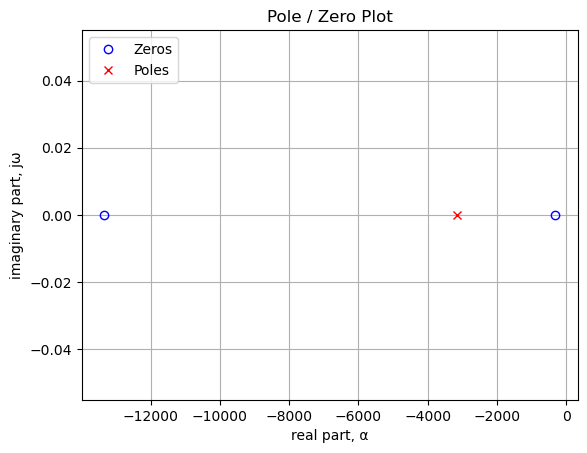

In [14]:
plt.plot(np.real(RIAA_zeros), np.imag(RIAA_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(RIAA_poles), np.imag(RIAA_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=2)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

In [15]:
print('number of zeros: {:d}'.format(len(RIAA_zeros)))
for i in RIAA_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 2
-2,122.07 Hz
-50.05 Hz


In [16]:
print('number of poles: {:d}'.format(len(RIAA_poles)))
for i in RIAA_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 1
-500.49 Hz


As shown in the plot above, the poles and zeros lay on the negative real axis. The de-emphasis transfer function of the phono pre-amplifier should have poles at the zero locations and a zero in the pole location in the plot above. 

The code below is used to convert SymPy symbolic equations to a NumPy polynomial representation. The SciPy function, [TransferFunction](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.TransferFunction.html#scipy-signal-transferfunction), represents the system as the continuous-time transfer function. The NumPy function, [logspace](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html), is used to generate data points on a log scale for plotting. The SciPy function, [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html#scipy.signal.bode), is used to generate the magnitude and phase data of a continuous-time system.

In [17]:
a = np.array(Poly(RIAA_num, s).all_coeffs(), dtype=float)
b = np.array(Poly(RIAA_denom, s).all_coeffs(), dtype=float)
RIAA_sys = signal.TransferFunction(a,b)

x_axis_range = np.logspace(1, 5.5, 100, endpoint=True)*2*np.pi

w_RIAA, mag_RIAA, phase_RIAA = RIAA_sys.bode(w=x_axis_range) # returns: rad/s, mag in dB, phase in deg

Find the gain at 1kHz so the plots can be normalized for 0 dB at 1 kHz.

In [18]:
RIAA_gain_1kHz = get_gain(1000,RIAA_sys)

In [19]:
print('The RIAA gain at 1kHz: {:.3f} dB'.format(RIAA_gain_1kHz))

The RIAA gain at 1kHz: 19.911 dB


Plot the magnitude and phase of the RIAA curve.

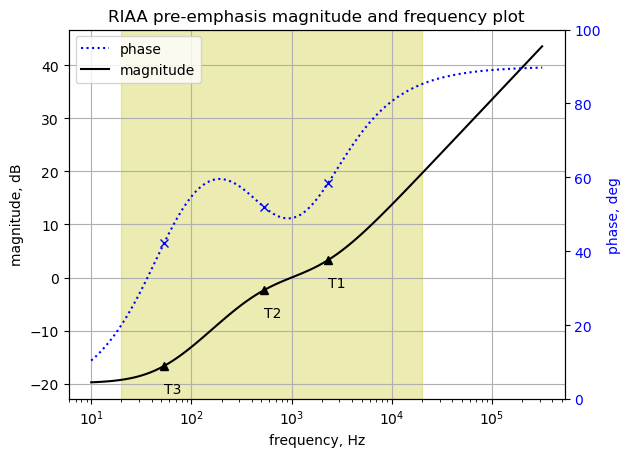

In [20]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w_RIAA/(2*np.pi), mag_RIAA-RIAA_gain_1kHz,'-k')    # Bode magnitude plot, normalized to 0 at 1kHz

# mark individual points
p3 = np.where(w_RIAA > 49.9*(2*np.pi))[0][0]
p2 = np.where(w_RIAA > 499.9*(2*np.pi))[0][0]
p1 = np.where(w_RIAA > 2122*(2*np.pi))[0][0]

plt.semilogx(w_RIAA[p1]/(2*np.pi), mag_RIAA[p1]-RIAA_gain_1kHz,'^k')
plt.semilogx(w_RIAA[p2]/(2*np.pi), mag_RIAA[p2]-RIAA_gain_1kHz,'^k')
plt.semilogx(w_RIAA[p3]/(2*np.pi), mag_RIAA[p3]-RIAA_gain_1kHz,'^k')

plt.text(w_RIAA[p1]/(2*np.pi), mag_RIAA[p1]-25,'T1')
plt.text(w_RIAA[p2]/(2*np.pi), mag_RIAA[p2]-25,'T2')
plt.text(w_RIAA[p3]/(2*np.pi), mag_RIAA[p3]-25,'T3')

# highlight the audio band, 20 to 20kHz
plt.axvspan(20, 20e3, color='y', alpha=0.3)

ax1.tick_params(axis='y')
plt.grid()

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
plt.semilogx(w_RIAA/(2*np.pi), phase_RIAA,':',color='b',label='phase')  # Bode phase plot

# mark individual points
plt.semilogx(w_RIAA[p1]/(2*np.pi), phase_RIAA[p1],'xb')
plt.semilogx(w_RIAA[p2]/(2*np.pi), phase_RIAA[p2],'xb')
plt.semilogx(w_RIAA[p3]/(2*np.pi), phase_RIAA[p3],'xb')

ax2.set_ylabel('phase, deg',color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_ylim((0,100))

ax2.plot(np.NaN, np.NaN, color='k', label='magnitude')

plt.legend()
plt.title('RIAA pre-emphasis magnitude and frequency plot')
plt.show()

The plot above shows the frequency response of the RIAA curve. The frequencies corresponding to the time constants T1, T2 and T3 are plotted on the magnitude and phase curves. The audio band of 20Hz to 20kHz is highlighted. One thing to notice about this curve is that the amplitude is increasing as the frequency increases. This is not a realistic function, real circuits do not have an infinite gain as the frequency goes to infinity. Also, there is no zero at $j\omega=0$, so the pre-emphasis transfer function does not block DC.  

## Phono Preamplifier Design Procedure
The following notebook cells walk through the design procedure given in the application note, starting on page 5. 

A design procedure is shown below with an illustrative example using 1% tolerance E96 components for close conformance to the ideal RIAA curve. Since 1% tolerance capacitors are often difficult to find except in 5% or 10% standard values, the design procedure calls for re-calculation of a few component values so that standard capacitor values can be used.

1) Choose $R_o$. $R_o$ should be small for minimum noise contribution, but not so small that the feedback network excessively loads the amplifier.
Example: Choose $R_o = 500$

2) Choose 1 kHz gain, A1 of the first amplifier. This will typically be around 20 dB to 30 dB. Example: Choose A1 = 26 dB = 20

3) Calculate $R_11 = 8.058 \times R_o \times A_1$

In [21]:
A1 = 20
Ro = 500
R1 = 8.058 * Ro * A1
print('R1={:,.0f}'.format(R1))

R1=80,580


4) Calculate C1

$C_1 = \frac {3.18 \times 10^{-3}}{R_1}$

In [22]:
C1 = 3.18e-3/R1
print('C1={:.4e}'.format(C1))

C1=3.9464e-08


The calculated value for capacitor C1 is not a standard value, so step 5 takes care of this.

5) If C1 is not a convenient value, choose the nearest convenient value and calculate a new R1 from:

$R_1 = \frac {3.18 \times 10^{-3}}{3.9 \times 10^{-8}}$

Choose C1 to be 0.039$\mu$, which is a standard capacitor value.

In [23]:
C1 = 0.039e-6
R1 = 3.18e-3/C1
print('R1={:,.0f}'.format(R1))

R1=81,538


Now choose a standard resistor value close to the calculated value, which is 80.6k.

E96 resistor values are a set of preferred values for 1% resistors. When doing the calculations to determine the resistor values, the closest standard value is chosen from the E96 series. The [E series of preferred numbers](https://en.wikipedia.org/wiki/E_series_of_preferred_numbers) derived for use in electronic components. It consists of the E3, E6, E12, E24, E48, E96 and E192 series, where the number after the 'E' designates the quantity of logarithmic value "steps" per decade. 

In [24]:
R1 = 80.6e3

Calculate a new value for Ro.  

$R_o=\frac {R_1}{8.058A_1}$

In [25]:
Ro = R1/(8.058*A1)
print('R1={:,.0f}'.format(Ro))

R1=500


Choose a standard value close to this value, which is 499. 

In [26]:
Ro = 499

6. Calculate R2  
$R_2=\frac {R_1}{9} - R_o$

In [27]:
R2 = R1/9-Ro
print('R1={:,.0f}'.format(R2))

R1=8,457


Choose a standard value close to this value, which is 8.45k. 

In [28]:
R2 = 8.45e3

7. Choose a convenient value for C3 in the range from 0.01 $\mu$F to 0.05 $\mu$F.  
Example: C3 = 0.033 $\mu$F

In [29]:
C3 = 0.033e-6
print('C3={:,.3f}\u03BC'.format(C3*1e6))

C3=0.033μ


8. Calculate Rp  
$R_p=\frac {75 \mu s }{C_3}$  

$75 \mu s$ is one of the RIAA time constants. 

In [30]:
Rp = 75e-6/C3
print('Rp={:,.0f}'.format(Rp))

Rp=2,273


9. Choose a standard value for R3 that is slightly larger than Rp.  
Example: R3 = 2.37k, which is a standard resistor value.    

In [31]:
R3 = 2.37e3

10. Calculate R6 from $1/R_6 = 1/R_P − 1/R_3$

In [32]:
R6 = 1/(1/Rp-1/R3)
print('R6={:,.0f}'.format(R6))

R6=55,374


54.9k is the closest standard value.

In [33]:
R6 = 54.9e3

11. Calculate $C_4$ for low-frequency roll off below 1 Hz from design Equation 5.  

$C_4=\frac{1}{2\pi f_L(R_3+R_6)}$

Where $f_L$ is the low frequency -3dB corner of the second stage.

In the application note, there is a comment on page 4:   
> If the preamplifier is to follow the IEC recommendation (IEC Publication 98, Amendment #4), fL should equal 20.2 Hz.  

The calculations in the app note use 1 Hz.

In [34]:
f_L = 1.0 # Hz
C4 = 1/(2*np.pi*f_L*(R3+R6))
print('C4={:,.3f}\u03BC'.format(C4*1e6))

C4=2.779μ


2$\mu$F is a standard value close to the calculated value. 

Example: C4 = 2 $\mu$F.

12. Choose the gain of the second amplifier.  
Example: The 1 kHz gain up to the input of the second amplifier is about 26 dB for this example. For an overall 1 kHz gain equal to about 36 dB we choose:  
$A_2 = 10 dB = 3.16$

13. Choose value for R4.  
Example: R4 = 2k

In [35]:
R4 = 2e3


14. Calculate $R_5 = (A_2 − 1) R_4$

In [36]:
A2 = 3.16
R5 = (A2-1)*R4
print('R5={:,.0f}'.format(R5))

R5=4,320


4.3k is a standard value close to the calculated value. 

In [37]:
R5 = 4.3e3

15. Calculate Co for low-frequency roll off below 1 Hz from design Equation 7.  

$C_o=\frac {1}{2\pi f_o R_o}$

where fo is the low-frequency −3 dB corner of the first amplifier. fo is chosen to be 1Hz for the calculations since this frequency is well below the audible frequency range.

In [38]:
fo = 1 # 1 Hz
Co = 1/(2*np.pi*fo*Ro)
print('Co={:,.3f}\u03BC'.format(Co*1e6))

Co=318.948μ


The value chosen in the app note for this component is 200$\mu$F.  

In [39]:
Co = 200e-6

In [40]:
print('resonant frequency of Ro and Co: {:.2f}Hz'.format(1/(Co*Ro*2*np.pi)))

resonant frequency of Ro and Co: 1.59Hz


## Analysis of AN-346 phono preamplifier circuit
The schematic of the preamp was entered into LTSpice and the netlist was generated. Starting with a schematic and then using LTSpice to generate the net list eliminates errors that would occur if these circuits were analyzed by hand. For small circuits with a handful of components, symbolic solutions of the node equations can be of interest, but for larger circuits, not so much. This is because the number of symbols and equations is too large to offer in insight without some simplification. 

In this section the modified nodal analysis method will be used to generate the circuit equations. The modified nodal analysis provides an algorithmic method for generating systems of independent equations for linear circuit analysis. Most problems that an electrical engineer encounters on the job are complex enough that they use computers to analyze the circuits. The Python code that generates the circuit's equations is located [here](https://github.com/Tiburonboy/Symbolic-modified-nodal-analysis).

### Modified nodal analysis
The preamp circuit has 15 branches, 9 nodes, 3 unknown currents, 14 passive components and 2 op amps. The net list generated by LTSpice and some edits were made to put the component values into scientific notation with units of Ohms, Farads and Henerys and the Op Amp statements were fixed. The edited netlist is: 

```
V1 1 0 5e-3
O1 3 1 6 
O2 9 8 2 
C1 3 5 0.039e-6
Co 4 0 200e-6
Ro 3 4 499
R3 6 7 2.37e3
R1 3 5 80.6e3
R2 5 6 8.45e3
Cp 1 0 100e-12
Rp 1 0 47e3
C3 7 0 0.033e-6
C4 8 7 2e-6
R6 8 0 54.9e3
R4 9 0 2e3
R5 2 9 4.3e3
```
<!--
This netlist is read into the Symbolic Modified Nodal Analysis Jupyter notebook and the following circuit equations were generated.  

$I_{V1} + v_{1} \left(Cp s + \frac{1}{R_{20}}\right) = 0$  
$v_{2} \left(C_{1} s + \frac{1}{Ro} + \frac{1}{R_{1}}\right) + v_{4} \left(- C_{1} s - \frac{1}{R_{1}}\right) - \frac{v_{3}}{Ro} = 0$  
$v_{3} \left(Co s + \frac{1}{Ro}\right) - \frac{v_{2}}{Ro} = 0$  
$v_{2} \left(- C_{1} s - \frac{1}{R_{1}}\right) + v_{4} \left(C_{1} s + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{5}}{R_{2}} = 0$  
$I_{O1} + v_{5} \cdot \left(\frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{6}}{R_{3}} - \frac{v_{4}}{R_{2}} = 0$  
$- C_{4} s v_{7} + v_{6} \left(C_{3} s + C_{4} s + \frac{1}{R_{3}}\right) - \frac{v_{5}}{R_{3}} = 0$  
$- C_{4} s v_{6} + v_{7} \left(C_{4} s + \frac{1}{R_{6}}\right) = 0$  
$v_{8} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{4}}\right) - \frac{v_{9}}{R_{5}} = 0$  
$I_{O2} + v_{9} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{22}}\right) - \frac{v_{8}}{R_{5}} = 0$  
$v_{1} = V_{1}$  
$- v_{1} + v_{2} = 0$  
$- v_{7} + v_{8} = 0$  

The symbols and matrices generated by the modified nodal analysis code are copied here so that the circuit equations can be solved symbolically and later numerically.  All the symbols that SymPy needs defined are declared. The A matrix describes the connectivity of the resistors, capacitors and G type (VCCS) circuit elements. The X matrix contains the unknown node voltages and unknown currents. The Z matrix contains the known voltages and currents sources, e.g. V1.  
-->

The netlist for the circuit is pasted into the code cell below. In Python a triple-quoted string includes whitespace, tabs and newlines. The newlines characters are needed to mark the end of each SPICE statement in the netlist.

In [41]:
net_list = '''
V1 1 0 5e-3
O1 3 1 6 
O2 9 8 2 
C1 3 5 0.039e-6
Co 4 0 200e-6
Ro 3 4 499
R3 6 7 2.37e3
R1 3 5 80.6e3
R2 5 6 8.45e3
Cp 1 0 100e-12
Rp 1 0 47e3
C3 7 0 0.033e-6
C4 8 7 2e-6
R6 8 0 54.9e3
R4 9 0 2e3
R5 2 9 4.3e3
'''

Call the symbolic modified nodal analysis function.

In [42]:
report, network_df, i_unk_df, A, X, Z = SymMNA.smna(net_list)

The network equations for the circuit can be obtained from the A, X and Z values returned from the SMNA function. The A, X and Z are formulated into equations and displayed below. Markdown is an IPython function and latex is a SymPy printing function.

In [43]:
# Put matrices into SymPy 
X = Matrix(X)
Z = Matrix(Z)

NE_sym = Eq(A*X,Z)

temp = ''
for i in range(shape(NE_sym.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(NE_sym.rhs[i]),latex(NE_sym.lhs[i]))
Markdown(temp)

$0 = I_{V1} + v_{1} \left(Cp s + \frac{1}{Rp}\right)$<br>$0 = I_{O2} + \frac{v_{2}}{R_{5}} - \frac{v_{9}}{R_{5}}$<br>$0 = v_{3} \left(C_{1} s + \frac{1}{Ro} + \frac{1}{R_{1}}\right) + v_{5} \left(- C_{1} s - \frac{1}{R_{1}}\right) - \frac{v_{4}}{Ro}$<br>$0 = v_{4} \left(Co s + \frac{1}{Ro}\right) - \frac{v_{3}}{Ro}$<br>$0 = v_{3} \left(- C_{1} s - \frac{1}{R_{1}}\right) + v_{5} \left(C_{1} s + \frac{1}{R_{2}} + \frac{1}{R_{1}}\right) - \frac{v_{6}}{R_{2}}$<br>$0 = I_{O1} + v_{6} \cdot \left(\frac{1}{R_{3}} + \frac{1}{R_{2}}\right) - \frac{v_{7}}{R_{3}} - \frac{v_{5}}{R_{2}}$<br>$0 = - C_{4} s v_{8} + v_{7} \left(C_{3} s + C_{4} s + \frac{1}{R_{3}}\right) - \frac{v_{6}}{R_{3}}$<br>$0 = - C_{4} s v_{7} + v_{8} \left(C_{4} s + \frac{1}{R_{6}}\right)$<br>$0 = v_{9} \cdot \left(\frac{1}{R_{5}} + \frac{1}{R_{4}}\right) - \frac{v_{2}}{R_{5}}$<br>$V_{1} = v_{1}$<br>$0 = - v_{1} + v_{3}$<br>$0 = - v_{8} + v_{9}$<br>

Turn the free symbols into SymPy variables.

In [44]:
var(str(NE_sym.free_symbols).replace('{','').replace('}',''))

These equations can be solved in their symbolic form using the solve function from SymPy. The solution time takes about 3 seconds on my i3 laptop. 

In [45]:
U_preamp_sym = solve(NE_sym,X)

Display the symbolic solution to the newtork equations.

In [46]:
temp = ''
for i in U_preamp_sym.keys():
    temp += '${:s} = {:s}$<br>'.format(latex(i),latex(U_preamp_sym[i]))

Markdown(temp)

$v_{1} = V_{1}$<br>$v_{2} = \frac{C_{1} C_{4} Co R_{1} R_{2} R_{4} R_{6} V_{1} s^{3} + C_{1} C_{4} Co R_{1} R_{2} R_{5} R_{6} V_{1} s^{3} + C_{1} C_{4} Co R_{1} R_{4} R_{6} Ro V_{1} s^{3} + C_{1} C_{4} Co R_{1} R_{5} R_{6} Ro V_{1} s^{3} + C_{1} C_{4} R_{1} R_{4} R_{6} V_{1} s^{2} + C_{1} C_{4} R_{1} R_{5} R_{6} V_{1} s^{2} + C_{4} Co R_{1} R_{4} R_{6} V_{1} s^{2} + C_{4} Co R_{1} R_{5} R_{6} V_{1} s^{2} + C_{4} Co R_{2} R_{4} R_{6} V_{1} s^{2} + C_{4} Co R_{2} R_{5} R_{6} V_{1} s^{2} + C_{4} Co R_{4} R_{6} Ro V_{1} s^{2} + C_{4} Co R_{5} R_{6} Ro V_{1} s^{2} + C_{4} R_{4} R_{6} V_{1} s + C_{4} R_{5} R_{6} V_{1} s}{C_{1} C_{3} C_{4} Co R_{1} R_{3} R_{4} R_{6} Ro s^{4} + C_{1} C_{3} C_{4} R_{1} R_{3} R_{4} R_{6} s^{3} + C_{1} C_{3} Co R_{1} R_{3} R_{4} Ro s^{3} + C_{1} C_{3} R_{1} R_{3} R_{4} s^{2} + C_{1} C_{4} Co R_{1} R_{3} R_{4} Ro s^{3} + C_{1} C_{4} Co R_{1} R_{4} R_{6} Ro s^{3} + C_{1} C_{4} R_{1} R_{3} R_{4} s^{2} + C_{1} C_{4} R_{1} R_{4} R_{6} s^{2} + C_{1} Co R_{1} R_{4} Ro s^{2} + C_{1} R_{1} R_{4} s + C_{3} C_{4} Co R_{3} R_{4} R_{6} Ro s^{3} + C_{3} C_{4} R_{3} R_{4} R_{6} s^{2} + C_{3} Co R_{3} R_{4} Ro s^{2} + C_{3} R_{3} R_{4} s + C_{4} Co R_{3} R_{4} Ro s^{2} + C_{4} Co R_{4} R_{6} Ro s^{2} + C_{4} R_{3} R_{4} s + C_{4} R_{4} R_{6} s + Co R_{4} Ro s + R_{4}}$<br>$v_{3} = V_{1}$<br>$v_{4} = \frac{V_{1}}{Co Ro s + 1}$<br>$v_{5} = \frac{C_{1} Co R_{1} Ro V_{1} s^{2} + C_{1} R_{1} V_{1} s + Co R_{1} V_{1} s + Co Ro V_{1} s + V_{1}}{C_{1} Co R_{1} Ro s^{2} + C_{1} R_{1} s + Co Ro s + 1}$<br>$v_{6} = \frac{C_{1} Co R_{1} R_{2} V_{1} s^{2} + C_{1} Co R_{1} Ro V_{1} s^{2} + C_{1} R_{1} V_{1} s + Co R_{1} V_{1} s + Co R_{2} V_{1} s + Co Ro V_{1} s + V_{1}}{C_{1} Co R_{1} Ro s^{2} + C_{1} R_{1} s + Co Ro s + 1}$<br>$v_{7} = \frac{C_{1} C_{4} Co R_{1} R_{2} R_{6} V_{1} s^{3} + C_{1} C_{4} Co R_{1} R_{6} Ro V_{1} s^{3} + C_{1} C_{4} R_{1} R_{6} V_{1} s^{2} + C_{1} Co R_{1} R_{2} V_{1} s^{2} + C_{1} Co R_{1} Ro V_{1} s^{2} + C_{1} R_{1} V_{1} s + C_{4} Co R_{1} R_{6} V_{1} s^{2} + C_{4} Co R_{2} R_{6} V_{1} s^{2} + C_{4} Co R_{6} Ro V_{1} s^{2} + C_{4} R_{6} V_{1} s + Co R_{1} V_{1} s + Co R_{2} V_{1} s + Co Ro V_{1} s + V_{1}}{C_{1} C_{3} C_{4} Co R_{1} R_{3} R_{6} Ro s^{4} + C_{1} C_{3} C_{4} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} Co R_{1} R_{3} Ro s^{3} + C_{1} C_{3} R_{1} R_{3} s^{2} + C_{1} C_{4} Co R_{1} R_{3} Ro s^{3} + C_{1} C_{4} Co R_{1} R_{6} Ro s^{3} + C_{1} C_{4} R_{1} R_{3} s^{2} + C_{1} C_{4} R_{1} R_{6} s^{2} + C_{1} Co R_{1} Ro s^{2} + C_{1} R_{1} s + C_{3} C_{4} Co R_{3} R_{6} Ro s^{3} + C_{3} C_{4} R_{3} R_{6} s^{2} + C_{3} Co R_{3} Ro s^{2} + C_{3} R_{3} s + C_{4} Co R_{3} Ro s^{2} + C_{4} Co R_{6} Ro s^{2} + C_{4} R_{3} s + C_{4} R_{6} s + Co Ro s + 1}$<br>$v_{8} = \frac{C_{1} C_{4} Co R_{1} R_{2} R_{6} V_{1} s^{3} + C_{1} C_{4} Co R_{1} R_{6} Ro V_{1} s^{3} + C_{1} C_{4} R_{1} R_{6} V_{1} s^{2} + C_{4} Co R_{1} R_{6} V_{1} s^{2} + C_{4} Co R_{2} R_{6} V_{1} s^{2} + C_{4} Co R_{6} Ro V_{1} s^{2} + C_{4} R_{6} V_{1} s}{C_{1} C_{3} C_{4} Co R_{1} R_{3} R_{6} Ro s^{4} + C_{1} C_{3} C_{4} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} Co R_{1} R_{3} Ro s^{3} + C_{1} C_{3} R_{1} R_{3} s^{2} + C_{1} C_{4} Co R_{1} R_{3} Ro s^{3} + C_{1} C_{4} Co R_{1} R_{6} Ro s^{3} + C_{1} C_{4} R_{1} R_{3} s^{2} + C_{1} C_{4} R_{1} R_{6} s^{2} + C_{1} Co R_{1} Ro s^{2} + C_{1} R_{1} s + C_{3} C_{4} Co R_{3} R_{6} Ro s^{3} + C_{3} C_{4} R_{3} R_{6} s^{2} + C_{3} Co R_{3} Ro s^{2} + C_{3} R_{3} s + C_{4} Co R_{3} Ro s^{2} + C_{4} Co R_{6} Ro s^{2} + C_{4} R_{3} s + C_{4} R_{6} s + Co Ro s + 1}$<br>$v_{9} = \frac{C_{1} C_{4} Co R_{1} R_{2} R_{6} V_{1} s^{3} + C_{1} C_{4} Co R_{1} R_{6} Ro V_{1} s^{3} + C_{1} C_{4} R_{1} R_{6} V_{1} s^{2} + C_{4} Co R_{1} R_{6} V_{1} s^{2} + C_{4} Co R_{2} R_{6} V_{1} s^{2} + C_{4} Co R_{6} Ro V_{1} s^{2} + C_{4} R_{6} V_{1} s}{C_{1} C_{3} C_{4} Co R_{1} R_{3} R_{6} Ro s^{4} + C_{1} C_{3} C_{4} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} Co R_{1} R_{3} Ro s^{3} + C_{1} C_{3} R_{1} R_{3} s^{2} + C_{1} C_{4} Co R_{1} R_{3} Ro s^{3} + C_{1} C_{4} Co R_{1} R_{6} Ro s^{3} + C_{1} C_{4} R_{1} R_{3} s^{2} + C_{1} C_{4} R_{1} R_{6} s^{2} + C_{1} Co R_{1} Ro s^{2} + C_{1} R_{1} s + C_{3} C_{4} Co R_{3} R_{6} Ro s^{3} + C_{3} C_{4} R_{3} R_{6} s^{2} + C_{3} Co R_{3} Ro s^{2} + C_{3} R_{3} s + C_{4} Co R_{3} Ro s^{2} + C_{4} Co R_{6} Ro s^{2} + C_{4} R_{3} s + C_{4} R_{6} s + Co Ro s + 1}$<br>$I_{V1} = \frac{- Cp Rp V_{1} s - V_{1}}{Rp}$<br>$I_{O1} = \frac{- C_{1} C_{3} C_{4} Co R_{1} R_{2} R_{6} V_{1} s^{4} - C_{1} C_{3} C_{4} Co R_{1} R_{3} R_{6} V_{1} s^{4} - C_{1} C_{3} C_{4} Co R_{1} R_{6} Ro V_{1} s^{4} - C_{1} C_{3} C_{4} R_{1} R_{6} V_{1} s^{3} - C_{1} C_{3} Co R_{1} R_{2} V_{1} s^{3} - C_{1} C_{3} Co R_{1} R_{3} V_{1} s^{3} - C_{1} C_{3} Co R_{1} Ro V_{1} s^{3} - C_{1} C_{3} R_{1} V_{1} s^{2} - C_{1} C_{4} Co R_{1} R_{2} V_{1} s^{3} - C_{1} C_{4} Co R_{1} R_{3} V_{1} s^{3} - C_{1} C_{4} Co R_{1} R_{6} V_{1} s^{3} - C_{1} C_{4} Co R_{1} Ro V_{1} s^{3} - C_{1} C_{4} R_{1} V_{1} s^{2} - C_{1} Co R_{1} V_{1} s^{2} - C_{3} C_{4} Co R_{1} R_{6} V_{1} s^{3} - C_{3} C_{4} Co R_{2} R_{6} V_{1} s^{3} - C_{3} C_{4} Co R_{3} R_{6} V_{1} s^{3} - C_{3} C_{4} Co R_{6} Ro V_{1} s^{3} - C_{3} C_{4} R_{6} V_{1} s^{2} - C_{3} Co R_{1} V_{1} s^{2} - C_{3} Co R_{2} V_{1} s^{2} - C_{3} Co R_{3} V_{1} s^{2} - C_{3} Co Ro V_{1} s^{2} - C_{3} V_{1} s - C_{4} Co R_{1} V_{1} s^{2} - C_{4} Co R_{2} V_{1} s^{2} - C_{4} Co R_{3} V_{1} s^{2} - C_{4} Co R_{6} V_{1} s^{2} - C_{4} Co Ro V_{1} s^{2} - C_{4} V_{1} s - Co V_{1} s}{C_{1} C_{3} C_{4} Co R_{1} R_{3} R_{6} Ro s^{4} + C_{1} C_{3} C_{4} R_{1} R_{3} R_{6} s^{3} + C_{1} C_{3} Co R_{1} R_{3} Ro s^{3} + C_{1} C_{3} R_{1} R_{3} s^{2} + C_{1} C_{4} Co R_{1} R_{3} Ro s^{3} + C_{1} C_{4} Co R_{1} R_{6} Ro s^{3} + C_{1} C_{4} R_{1} R_{3} s^{2} + C_{1} C_{4} R_{1} R_{6} s^{2} + C_{1} Co R_{1} Ro s^{2} + C_{1} R_{1} s + C_{3} C_{4} Co R_{3} R_{6} Ro s^{3} + C_{3} C_{4} R_{3} R_{6} s^{2} + C_{3} Co R_{3} Ro s^{2} + C_{3} R_{3} s + C_{4} Co R_{3} Ro s^{2} + C_{4} Co R_{6} Ro s^{2} + C_{4} R_{3} s + C_{4} R_{6} s + Co Ro s + 1}$<br>$I_{O2} = \frac{- C_{1} C_{4} Co R_{1} R_{2} R_{6} V_{1} s^{3} - C_{1} C_{4} Co R_{1} R_{6} Ro V_{1} s^{3} - C_{1} C_{4} R_{1} R_{6} V_{1} s^{2} - C_{4} Co R_{1} R_{6} V_{1} s^{2} - C_{4} Co R_{2} R_{6} V_{1} s^{2} - C_{4} Co R_{6} Ro V_{1} s^{2} - C_{4} R_{6} V_{1} s}{C_{1} C_{3} C_{4} Co R_{1} R_{3} R_{4} R_{6} Ro s^{4} + C_{1} C_{3} C_{4} R_{1} R_{3} R_{4} R_{6} s^{3} + C_{1} C_{3} Co R_{1} R_{3} R_{4} Ro s^{3} + C_{1} C_{3} R_{1} R_{3} R_{4} s^{2} + C_{1} C_{4} Co R_{1} R_{3} R_{4} Ro s^{3} + C_{1} C_{4} Co R_{1} R_{4} R_{6} Ro s^{3} + C_{1} C_{4} R_{1} R_{3} R_{4} s^{2} + C_{1} C_{4} R_{1} R_{4} R_{6} s^{2} + C_{1} Co R_{1} R_{4} Ro s^{2} + C_{1} R_{1} R_{4} s + C_{3} C_{4} Co R_{3} R_{4} R_{6} Ro s^{3} + C_{3} C_{4} R_{3} R_{4} R_{6} s^{2} + C_{3} Co R_{3} R_{4} Ro s^{2} + C_{3} R_{3} R_{4} s + C_{4} Co R_{3} R_{4} Ro s^{2} + C_{4} Co R_{4} R_{6} Ro s^{2} + C_{4} R_{3} R_{4} s + C_{4} R_{4} R_{6} s + Co R_{4} Ro s + R_{4}}$<br>

The equations are displayed in maxtrix form below.

These equations can be solved in their symbolic form using the solve function from SymPy. The solution time takes about 3 seconds on my i3 laptop. 

The transfer function for the preamp is the equation for the output node, 2, divided by the equation for the input node 1. 

In [47]:
H_preamp_sym = U_preamp_sym[v2]/U_preamp_sym[v1]

The symbolic solution obtained by SymPy, while not being very interesting since they are unwieldy, illustrate the power of SymPy to easily obtain symbolic solutions that would be very difficult to obtain by hand. 

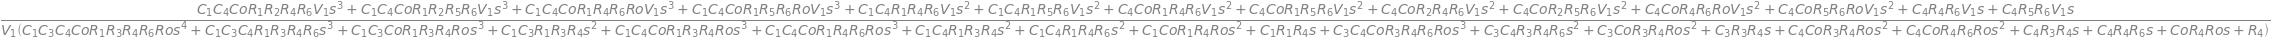

In [48]:
H_preamp_sym

The SymPy function, cancel(), can be used to put the preamp transfer function in to standard canonical form, where the polynomials are expanded with no common factors and the leading coefficients do not have denominators (i.e., are integers).

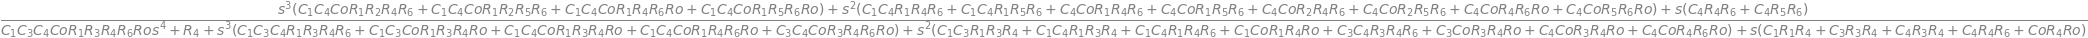

In [49]:
cancel(H_preamp_sym,s)

The Sympy function, factor(), can be used to factor the polynomials into irreducible factors over the rational numbers.

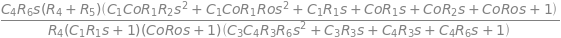

In [50]:
H_preamp_sym.factor()

The symbolic solutions obtained above will be used later when the sensitivity analysis of the preamp is performed.  Otherwise the roots in symbolic form don't seem to be particularly insightful, but are easily obtained by SymPy.

#### Numerical solution
The element values are put into the Python dictionary format so that numerical values can be substituted into the equations.

In [51]:
nominal_component_value = {V1:5.0000e-03, C1:3.9000e-08, Co:2.0000e-04, Ro:4.9900e+02, R3:2.3700e+03, R1:8.0600e+04, 
    R2:8.4500e+03, Cp:1.0000e-10, Rp:4.7000e+04, C3:3.3000e-08, C4:2.0000e-06, R6:5.4900e+04, R4:2.0000e+03, R5:4.3000e+03}

# put the element values into the equations
preamp_equ = NE_sym.subs(nominal_component_value)

Now we can display the network equations with values for the components instead of symbols.

In [52]:
temp = ''
for i in range(shape(preamp_equ.lhs)[0]):
    temp += '${:s} = {:s}$<br>'.format(latex(preamp_equ.rhs[i]),latex(preamp_equ.lhs[i]))

Markdown(temp)

$0 = I_{V1} + v_{1} \cdot \left(1.0 \cdot 10^{-10} s + 2.12765957446809 \cdot 10^{-5}\right)$<br>$0 = I_{O2} + 0.000232558139534884 v_{2} - 0.000232558139534884 v_{9}$<br>$0 = v_{3} \cdot \left(3.9 \cdot 10^{-8} s + 0.00201641496392288\right) - 0.00200400801603206 v_{4} + v_{5} \left(- 3.9 \cdot 10^{-8} s - 1.24069478908189 \cdot 10^{-5}\right)$<br>$0 = - 0.00200400801603206 v_{3} + v_{4} \cdot \left(0.0002 s + 0.00200400801603206\right)$<br>$0 = v_{3} \left(- 3.9 \cdot 10^{-8} s - 1.24069478908189 \cdot 10^{-5}\right) + v_{5} \cdot \left(3.9 \cdot 10^{-8} s + 0.000130750143157091\right) - 0.000118343195266272 v_{6}$<br>$0 = I_{O1} - 0.000118343195266272 v_{5} + 0.000540284123536314 v_{6} - 0.000421940928270042 v_{7}$<br>$0 = - 2.0 \cdot 10^{-6} s v_{8} - 0.000421940928270042 v_{6} + v_{7} \cdot \left(2.033 \cdot 10^{-6} s + 0.000421940928270042\right)$<br>$0 = - 2.0 \cdot 10^{-6} s v_{7} + v_{8} \cdot \left(2.0 \cdot 10^{-6} s + 1.82149362477231 \cdot 10^{-5}\right)$<br>$0 = - 0.000232558139534884 v_{2} + 0.000732558139534884 v_{9}$<br>$0.005 = v_{1}$<br>$0 = - v_{1} + v_{3}$<br>$0 = - v_{8} + v_{9}$<br>

Solve for voltages and currents.

Using the SymPy solve function we can solve the system of equations.

In [53]:
U_preamp = solve(preamp_equ,X)

The values of the exponents are very large in the solution. The numerator and denominator for v2 could be normalized. Another option for avoiding large exponents is to 1st normalize the component values by frequency scaling. I suppose that large exponents don't become a problem as long as they remain under two digits.

Letting SciPy do the math and not worrying about the size of the exponents. The transfer function can be obtained by dividing the equation for node 2 by the equation for node 1.
The system transfer function, is $H(s) = \frac {v2}{V1}$

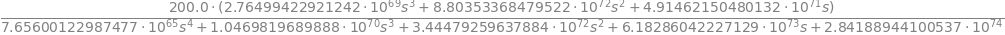

In [54]:
H_preamp = U_preamp[v2]/U_preamp[v1]
H_preamp

factor() takes a polynomial and factors it into irreducible factors over the rational numbers. For example:

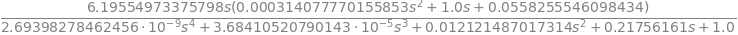

In [55]:
H_preamp.factor()

#### Convert transfer function to SciPy system
In this section we convert the SymPy equations into NumPy format.  

Extract the numerator and denominator polynomials so that the system can be defined in SciPy.

In [56]:
H_preamp_num, H_preamp_denom = fraction(H_preamp) #returns numerator and denominator

The SciPy function, TransferFunction(), represents the system as the continuous-time transfer function and takes as inputs the coefficients of the numerator and denominator polynomials.

In [57]:
# convert symbolic to numpy polynomial
a2 = np.array(Poly(H_preamp_num, s).all_coeffs(), dtype=float)
b2 = np.array(Poly(H_preamp_denom, s).all_coeffs(), dtype=float)
preamp_sys = signal.TransferFunction(a2,b2)

The poles and zeros of the transfer function can easily be obtained with the following code:

In [58]:
preamp_sys_zeros = np.roots(preamp_sys.num)
preamp_sys_poles = np.roots(preamp_sys.den)

### Pole zero plot
The poles and zeros of the preamp transfer function are plotted.

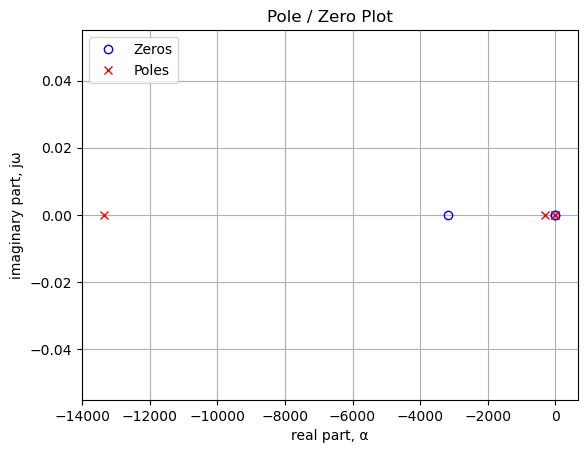

In [59]:
plt.plot(np.real(preamp_sys_zeros), np.imag(preamp_sys_zeros), 'ob', markerfacecolor='none')
plt.plot(np.real(preamp_sys_poles), np.imag(preamp_sys_poles), 'xr')
plt.legend(['Zeros', 'Poles'], loc=2)
plt.title('Pole / Zero Plot')
plt.xlabel('real part, \u03B1')
plt.ylabel('imaginary part, j\u03C9')
plt.grid()
plt.show()

Poles and zeros of the transfer function plotted on the complex plane. The units are in radian frequency.

Printing these values in Hz.

In [60]:
print('number of zeros: {:d}'.format(len(preamp_sys_zeros)))
for i in preamp_sys_zeros:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of zeros: 3
-506.73 Hz
-0.01 Hz
0.00 Hz


In [61]:
print('number of poles: {:d}'.format(len(preamp_sys_poles)))
for i in preamp_sys_poles:
    print('{:,.2f} Hz'.format(i/(2*np.pi)))

number of poles: 4
-2,122.88 Hz
-50.63 Hz
-1.59 Hz
-1.39 Hz


We can see that the RIAA time constants, displayed in terms of frequency are present, although the values differ by a few Hz. There are two zeros and two poles at nearly zero Hz and these cancel each other. 

### Stability
By inspecting the plot above, we can tell the preamplifier is stable since the phase shift at 0 dB of gain is less than 180 degrees. Additionally, all the poles of the transfer function are in the left hand plane.

Now we can find the preamp gain at 1 kHz, so that the bode plots can be normalized.

In [62]:
preamp_gain_1kHz = get_gain(1000, preamp_sys)
print('preamp gain at 1kHz: {:f} dB'.format(preamp_gain_1kHz))

preamp gain at 1kHz: 34.783614 dB


### Bode plot, Frequency and phase response
Use the SciPy function [bode](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html) to plot the magnitude and phase of the filter. 

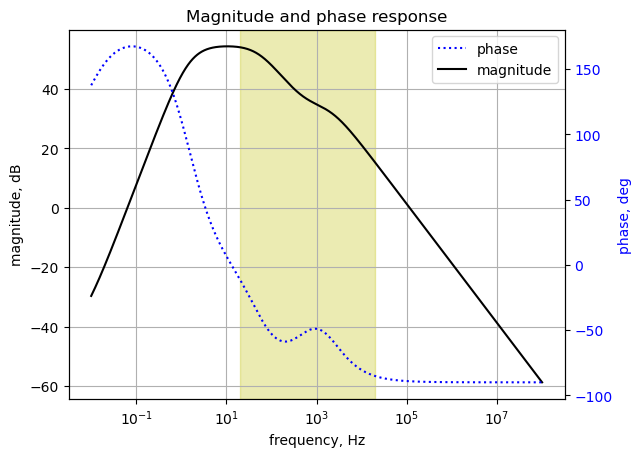

In [63]:
extended_x_axis_range = np.logspace(-2, 8, 5000, endpoint=True)*2*np.pi
w_preamp, mag_preamp, phase_preamp = preamp_sys.bode(w=extended_x_axis_range)

fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w_preamp/(2*np.pi), mag_preamp,'-k')    # Bode magnitude plot

ax1.tick_params(axis='y')
plt.grid()
plt.axvspan(20, 20e3, color='y', alpha=0.3)

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'b' #'tab:blue'

plt.semilogx(w_preamp/(2*np.pi), phase_preamp,':',color=color,label='phase')  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot(np.NaN, np.NaN, '-', color='k', label='magnitude')

plt.legend(loc=0)
plt.title('Magnitude and phase response')
plt.show()

The magnitude and phase plot for the preamplifier is plotted from 0.01 Hz to 100 MHz. The preamplifier circuit blocks DC because C4 is in series with the audio path. 

### Impulse and step response
Use the SciPy functions [impulse](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.impulse.html) and [step](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.step.html) to plot the impulse and step response of the system.

The [impulse](https://en.wikipedia.org/wiki/Impulse_response) and [step response](https://en.wikipedia.org/wiki/Step_response) of the filter are plotted below. Any linear, time-invariant is completely characterized by its impulse response. The transfer function is the Laplace transform of the impulse response. The impulse response defines the response of a linear time-invariant system for all frequencies.

In electronic engineering and control theory, step response is the time behavior of the outputs of a general system when its inputs change from zero to one in a very short time.

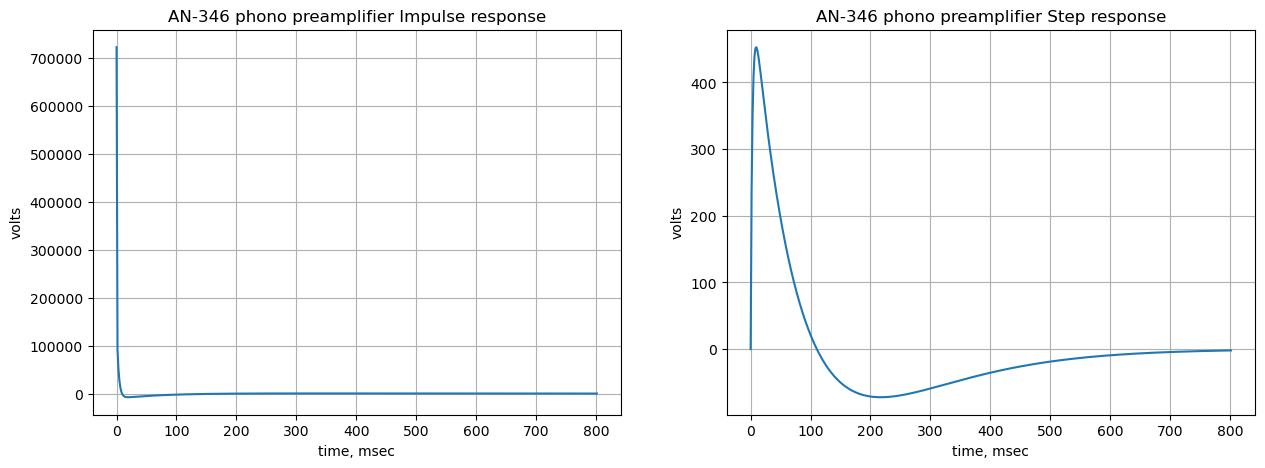

In [64]:
plt.subplots(1,2,figsize=(15, 5))

# using subplot function and creating
# plot one
plt.subplot(1, 2, 1)

# impulse response
t, y = signal.impulse(preamp_sys,N=500)
plt.plot(t/1e-3, y)
plt.title('AN-346 phono preamplifier Impulse response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# using subplot function and creating plot two
plt.subplot(1, 2, 2)

t, y = signal.step(preamp_sys,N=500)
plt.plot(t/1e-3, y)
plt.title('AN-346 phono preamplifier Step response')
plt.ylabel('volts')
plt.xlabel('time, msec')
plt.grid()

# space between the plots
#plt.tight_layout(4)

# show plot
plt.show()

### Group delay
The following python code calculates and plots [group delay](https://en.wikipedia.org/wiki/Group_delay_and_phase_delay#). Frequency components of a signal are delayed when passed through a circuit and the signal delay will be different for the various frequencies unless the circuit has the property of being linear phase. The delay variation means that signals consisting of multiple frequency components will suffer distortion because these components are not delayed by the same amount of time at the output of the device.

Group delay: $\tau _{g}(\omega )=-\frac  {d\phi (\omega )}{d\omega }$

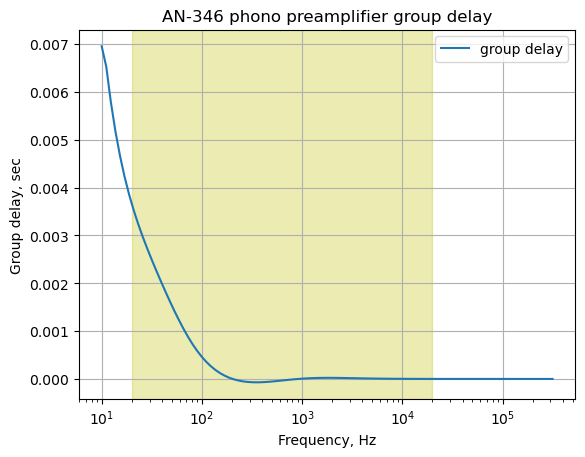

In [65]:
w_preamp, mag_preamp, phase_preamp = preamp_sys.bode(w=x_axis_range)

plt.title('AN-346 phono preamplifier group delay')
plt.semilogx(w_preamp/(2*np.pi), -np.gradient(phase_preamp*np.pi/180)/np.gradient(w_preamp),'-',label='group delay')

#plt.semilogx(w_c1/(2*np.pi), -np.gradient(phase_c1)/w_c1/1e-3,'-',label='phase delay')
plt.axvspan(20, 20e3, color='y', alpha=0.3)
plt.ylabel('Group delay, sec')
plt.xlabel('Frequency, Hz')
plt.legend()
plt.grid()
plt.show()

The plot above shows that for frequencies below 100 Hz, the group delay is as much as 4 ms in the audio band. According to paper, [Audibility of Group-Delay Equalization](https://acris.aalto.fi/ws/portalfiles/portal/66449704/Audibility_of_Group_Delay_Equalization.pdf), the threshold is 2 ms. The abstract for the paper states: 

> The audibility thresholds for group-delay variation from several previous related studies are shown in Fig. 1. If not otherwise stated, these studies have been conducted using headphones. Green applied Huffman sequences, or truncated impulse responses of second-order allpass filters, to study the audibility of phase distortion. He found a threshold value for the peak group delay of about 2 ms for center frequencies of 625 Hz, 1875 Hz, and 4062 Hz.

The preamp group delay in the low end of the audio band is of concern and some re-design should be implemented if this preamp was to be implemented. The group delay plotted above agrees with the group delay results obtained from LTSpice simulation of the preamp circuit.

### Preamplifier deviation from RIAA response
The plot below shows the deviation of the preamplifier from the RIAA response. The TI app note says conformance to the RIAA curve is within 0.1 dB from 20 Hz to 20 kHz. The series response of the RIAA curve with that of the preamp response curve can be obtained by adding the magnitude quantities. If the preamp response is the exact inverse of the RIAA curve, the result will be a flat line.

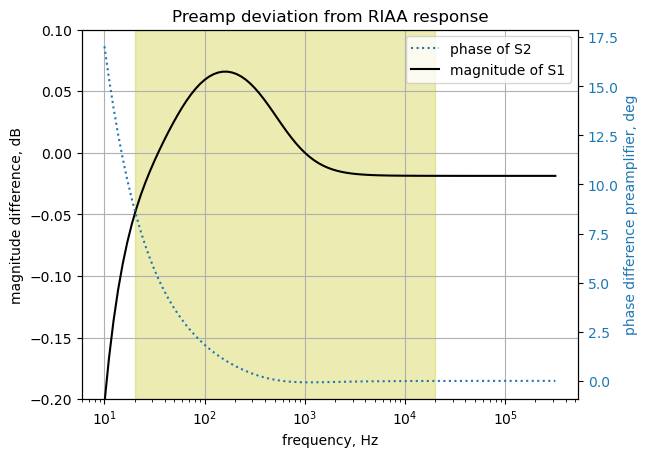

In [66]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude difference, dB')
ax1.set_xlabel('frequency, Hz')

plt.semilogx(w_preamp/(2*np.pi), (mag_RIAA-RIAA_gain_1kHz) + mag_preamp-preamp_gain_1kHz,'-k')    # Bode magnitude plot

ax1.tick_params(axis='y')
ax1.set_ylim((-0.2,0.1))
plt.grid()
plt.axvspan(20, 20e3, color='y', alpha=0.3)

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

plt.semilogx(w_preamp/(2*np.pi), phase_RIAA+phase_preamp,':',color=color,label='phase of S2')  # Bode phase plot

ax2.set_ylabel('phase difference preamplifier, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax2.plot(np.NaN, np.NaN, '-', color='k', label='magnitude of S1')
plt.legend(loc=0)

plt.title('Preamp deviation from RIAA response')
plt.show()

The calculations below will find the minimum and maximun deviation of the amplitude response from the RIAA curve. 

In [67]:
idx_low = np.where(w_preamp/(2*np.pi) > 20)[0][0]
idx_high = np.where(w_preamp/(2*np.pi) > 20e3)[0][0]
print('preamp deviation from RIAA curve: {:.3f} to {:.3f} dB'.format(((mag_RIAA-RIAA_gain_1kHz) + mag_preamp-preamp_gain_1kHz)[idx_low:idx_high].min(),((mag_RIAA-RIAA_gain_1kHz) + mag_preamp-preamp_gain_1kHz)[idx_low:idx_high].max()))

preamp deviation from RIAA curve: -0.045 to 0.066 dB


The calculations above show that within the audio range the deviation of the preamp amplitude response from the RIAA curve varies from -0.044 to 0.066 dB when the nominal component values are used. 

### Sensitivity analysis
All circuits have characteristics that depend on the values of the component. The sensitivity of a circuit's performance is a measure of how much a particular circuit characteristic changes as a particular component value varies. In this analysis I'll look at the changes of each pole or zero relative to the component's value.

The root sensitivity function $S_x^y$ gives the change occurring in filter characteristic per $\delta y/ \delta x$.  

$S_x^y$ is read as the sensitivity of the characteristic (i.e. y = $\omega_n,$ or Q or some other characteristic) with respect to the element x.

$S_x^y = \frac {x}{y} \frac{\delta y}{\delta x}$

Where x is the filter component that is varied and y is the filter characteristic ($\omega_n,$ or Q etc.) that we wish to evaluate as x is varied.

The preamp transfer function in symbolic form is, H_preamp_sym, and we can get the numerator and denominator with the SymPy fraction function.

In [68]:
H_sym_num, H_sym_denom = fraction(H_preamp_sym)

The SymPy solve function is used to find the root of the numerator and denominator polynomials.

In [69]:
H_sym_zeros = solve(H_sym_num,s)
H_sym_poles = solve(H_sym_denom,s)

#### Zeros
How many roots are there for the numerator polynomial?

In [70]:
print('there are {:d} zeros'.format(len(H_sym_zeros)))

there are 3 zeros


#### Z0
The first zero is at DC.

In [71]:
H_sym_Z0 = H_sym_zeros[0]
H_sym_Z0

#### Z1
The second zero is given symbolically by the expression:

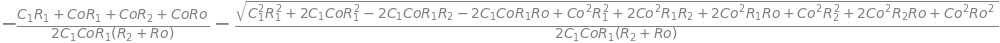

In [72]:
H_sym_Z1 = H_sym_zeros[1]
H_sym_Z1

What are the components that determine Z1?

In [73]:
print('the components that determine Z1 are: {:s} '.format(str(H_sym_Z1.free_symbols)))

the components that determine Z1 are: {Ro, C1, R2, R1, Co} 


What is the locations of Z1?

In [74]:
print('location of zero: {:.2f} Hz'.format(N(H_sym_Z1.subs(nominal_component_value))/(2*np.pi)))

location of zero: -506.73 Hz


Z1 is the zero at 500 Hz and is one of the RIAA time constants.

We can find the sensitivity of Z1 to C1 with the following operation.

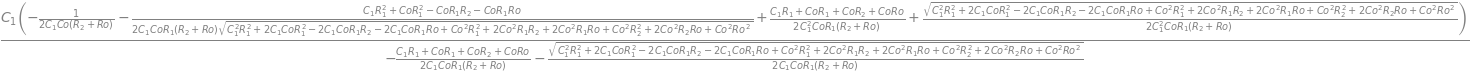

In [75]:
S_C1_H_sym_Z1 = (C1/H_sym_Z1)*(H_sym_Z1.diff(C1))
S_C1_H_sym_Z1

Evaluating this numerically with the component values, we get the sensitivity of Z1 to C1.

In [76]:
print('the sensitivity of Z1 to C1 is: {:.2f}'.format(N(S_C1_H_sym_Z1.subs(nominal_component_value))))

the sensitivity of Z1 to C1 is: -1.00


Doing the math with SymPy, we can get the sensitivity of Z1 to the other components. 

In [77]:
S_R1_H_sym_Z1 = (R1/H_sym_Z1)*(H_sym_Z1.diff(R1))
print('the sensitivity of Z1 to R1 is: {:.2f}'.format(N(S_R1_H_sym_Z1.subs(nominal_component_value))))

the sensitivity of Z1 to R1 is: -0.10


In [78]:
S_R2_H_sym_Z1 = (R2/H_sym_Z1)*(H_sym_Z1.diff(R2))
print('the sensitivity of Z1 to R2 is: {:.2f}'.format(N(S_R2_H_sym_Z1.subs(nominal_component_value))))

the sensitivity of Z1 to R2 is: -0.85


In [79]:
S_Co_H_sym_Z1 = (Co/H_sym_Z1)*(H_sym_Z1.diff(Co))
print('the sensitivity of Z1 to Co is: {:.4f}'.format(N(S_Co_H_sym_Z1.subs(nominal_component_value))))

the sensitivity of Z1 to Co is: -0.0002


In [80]:
S_Ro_H_sym_Z1 = (Ro/H_sym_Z1)*(H_sym_Z1.diff(Ro))
print('the sensitivity of Z1 to Ro is: {:.2f}'.format(N(S_Ro_H_sym_Z1.subs(nominal_component_value))))

the sensitivity of Z1 to Ro is: -0.05


Later, we are doing the worst case analysis, we can ignore Co. 

#### Z2
The third zero of the transfer function is Z2.

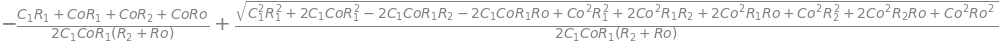

In [81]:
H_sym_Z2 = H_sym_zeros[2]
H_sym_Z2

In [82]:
print('the components that determine Z2 are: {:s} '.format(str(H_sym_Z2.free_symbols)))

the components that determine Z2 are: {Ro, C1, R2, R1, Co} 


In [83]:
print('Z2: {:.3e} Hz'.format(N(H_sym_Z2.subs(nominal_component_value))/(2*np.pi)))

Z2: -8.885e-3 Hz


The zero Z2, evaluates to a system zero at DC and is not one of the RIAA time constants.

In [84]:
S_C1_H_sym_Z2 = (C1/H_sym_Z2)*(H_sym_Z2.diff(C1))
print('the sensitivity of Z2 to C1 is: {:.3e}'.format(N(S_C1_H_sym_Z2.subs(nominal_component_value))))

the sensitivity of Z2 to C1 is: -1.580e-4


In [85]:
S_Co_H_sym_Z2 = (Co/H_sym_Z2)*(H_sym_Z2.diff(Co))
print('the sensitivity of Z2 to Co is: {:.2f}'.format(N(S_Co_H_sym_Z2.subs(nominal_component_value))))

the sensitivity of Z2 to Co is: -1.00


In [86]:
S_R1_H_sym_Z2 = (R1/H_sym_Z2)*(H_sym_Z2.diff(R1))
print('the sensitivity of Z2 to R1 is: {:.2f}'.format(N(S_R1_H_sym_Z2.subs(nominal_component_value))))

the sensitivity of Z2 to R1 is: -0.90


In [87]:
S_R2_H_sym_Z2 = (R2/H_sym_Z2)*(H_sym_Z2.diff(R2))
print('the sensitivity of Z2 to R2 is: {:.2f}'.format(N(S_R2_H_sym_Z2.subs(nominal_component_value))))

the sensitivity of Z2 to R2 is: -0.09


In [88]:
S_Ro_H_sym_Z2 = (Ro/H_sym_Z2)*(H_sym_Z2.diff(Ro))
print('the sensitivity of Z2 to Ro is: {:.3f}'.format(N(S_Ro_H_sym_Z2.subs(nominal_component_value))))

the sensitivity of Z2 to Ro is: -0.006


#### Poles
How many poles are there in the preamp transfer function?

In [89]:
print('there are {:d} poles in the transfer function'.format(len(H_sym_poles)))

there are 4 poles in the transfer function


#### P0
The first pole is:

In [90]:
H_sym_P0 = H_sym_poles[0]
H_sym_P0

The pole P0 evaluates to one of the RIAA time constants.

In [91]:
print('P0: {:.2f}Hz'.format(N(H_sym_P0.subs(nominal_component_value))/(2*np.pi)))

P0: -50.63Hz


In [92]:
S_C1_H_sym_P0 = (C1/H_sym_P0)*(H_sym_P0.diff(C1))
print('the sensitivity of P0 to C1 is: {:.2f}'.format(N(S_C1_H_sym_P0.subs(nominal_component_value))))

the sensitivity of P0 to C1 is: -1.00


In [93]:
S_R1_H_sym_P0 = (R1/H_sym_P0)*(H_sym_P0.diff(R1))
print('the sensitivity of P0 to R1 is: {:.2f}'.format(N(S_R1_H_sym_P0.subs(nominal_component_value))))

the sensitivity of P0 to R1 is: -1.00


#### P1
The second pole is:

In [94]:
H_sym_P1 = H_sym_poles[1]
H_sym_P1

The pole P1 evaluates to a frequency near DC.

In [95]:
print('P1: {:.2f}Hz'.format(N(H_sym_P1.subs(nominal_component_value))/(2*np.pi)))

P1: -1.59Hz


In [96]:
S_Co_H_sym_P1 = (Co/H_sym_P1)*(H_sym_P1.diff(Co))
print('the sensitivity of P1 to Co is: {:.2f}'.format(N(S_Co_H_sym_P1.subs(nominal_component_value))))

the sensitivity of P1 to Co is: -1.00


In [97]:
S_Ro_H_sym_P1 = (Ro/H_sym_P1)*(H_sym_P1.diff(Ro))
print('the sensitivity of P1 to Ro is: {:.2f}'.format(N(S_Ro_H_sym_P1.subs(nominal_component_value))))

the sensitivity of P1 to Ro is: -1.00


#### P2
The 3rd pole is:

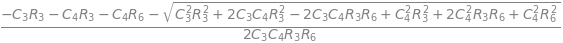

In [98]:
H_sym_P2 = H_sym_poles[2]
H_sym_P2

In [99]:
print('the components that determine P2 are: {:s} '.format(str(H_sym_P2.free_symbols)))

the components that determine P2 are: {C3, C4, R6, R3} 


In [100]:
print('P2: {:.2f}Hz'.format(N(H_sym_P2.subs(nominal_component_value))/(2*np.pi)))

P2: -2122.88Hz


In [101]:
S_C3_H_sym_P2 = (C3/H_sym_P2)*(H_sym_P2.diff(C3))
print('the sensitivity of P2 to C3 is: {:.2f}'.format(N(S_C3_H_sym_P2.subs(nominal_component_value))))

the sensitivity of P2 to C3 is: -1.00


In [102]:
S_C4_H_sym_P2 = (C4/H_sym_P2)*(H_sym_P2.diff(C4))
print('the sensitivity of P2 to C4 is: {:.3e}'.format(N(S_C4_H_sym_P2.subs(nominal_component_value))))

the sensitivity of P2 to C4 is: -2.829e-5


In [103]:
S_R3_H_sym_P2 = (R3/H_sym_P2)*(H_sym_P2.diff(R3))
print('the sensitivity of P2 to R3 is: {:.2f}'.format(N(S_R3_H_sym_P2.subs(nominal_component_value))))

the sensitivity of P2 to R3 is: -0.96


In [104]:
S_R6_H_sym_P2 = (R6/H_sym_P2)*(H_sym_P2.diff(R6))
print('the sensitivity of P2 to R6 is: {:.3f}'.format(N(S_R6_H_sym_P2.subs(nominal_component_value))))

the sensitivity of P2 to R6 is: -0.041


#### P3
The 4th pole is:

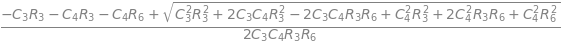

In [105]:
H_sym_P3 = H_sym_poles[3]
H_sym_P3

In [106]:
print('the components that determine P3 are: {:s} '.format(str(H_sym_P3.free_symbols)))

the components that determine P3 are: {C3, C4, R6, R3} 


In [107]:
print('P3: {:.2f}Hz'.format(N(H_sym_P3.subs(nominal_component_value))/(2*np.pi)))

P3: -1.39Hz


In [108]:
S_C3_H_sym_P3 = (C3/H_sym_P3)*(H_sym_P3.diff(C3))
print('the sensitivity of P3 to C3 is: {:.2e}'.format(N(S_C3_H_sym_P3.subs(nominal_component_value))))

the sensitivity of P3 to C3 is: -2.83e-5


In [109]:
S_C4_H_sym_P3 = (C4/H_sym_P3)*(H_sym_P3.diff(C4))
print('the sensitivity of P3 to C5 is: {:.2f}'.format(N(S_C4_H_sym_P3.subs(nominal_component_value))))

the sensitivity of P3 to C5 is: -1.00


In [110]:
S_R3_H_sym_P3 = (R3/H_sym_P3)*(H_sym_P3.diff(R3))
print('the sensitivity of P3 to R3 is: {:.2f}'.format(N(S_R3_H_sym_P3.subs(nominal_component_value))))

the sensitivity of P3 to R3 is: -0.04


In [111]:
S_R6_H_sym_P3 = (R6/H_sym_P3)*(H_sym_P3.diff(R6))
print('the sensitivity of P3 to R6 is: {:.2f}'.format(N(S_R6_H_sym_P3.subs(nominal_component_value))))

the sensitivity of P3 to R6 is: -0.96


In the worst case analysis below, the components that have sensitivities greater than 0.05 are the ones that factor into the worst case analysis.

### Component selection
The table below lists each of the components used in the preamp along with a link to the [Digikey](https://www.digikey.com/) pages for each of the components in the preamp. Digikey is a larger distributor of electronic components in the US. All the components have operating temperature ranges that exceed the normal household environment.

The resistors chosen are all 1% [Metal film](https://en.wikipedia.org/wiki/Resistor) type resistors. Metal film resistors possess good noise characteristics and low nonlinearity due to a low voltage coefficient. They are also beneficial due to long-term stability.

The capacitors are all polypropylene [Film capacitor](https://en.wikipedia.org/wiki/Film_capacitor) types. Polystyrene or polypropylene are considered the best for audio applications.

The Op Amp, [LM833N](https://www.ti.com/product/LM833#product-details), is a dual bipolar low noise ($\frac {4.5nV}{\sqrt{Hz}}$), wide bandwidth (16 MHz) audio operational amplifier from [Texas Instrments](https://www.ti.com/). 

| Ref | Value | Description | Digikey PN |
|---|---|---|---|
| Ro | 499 | ±1% 1/4W Metal Film | [RNF14FTD499RCT-ND](https://www.digikey.com/en/products/detail/stackpole-electronics-inc/RNF14FTD499R/1682304) |
| Rp | 47k | ±1% 1/4W Metal Film | [13-MFR-25FTE52-47KTB-ND](https://www.digikey.com/en/products/detail/yageo/MFR-25FTE52-47K/9140226) |
| R1 | 80.6k | ±1% 1/4W Metal Film | [80.6KXBK-ND](https://www.digikey.com/en/products/detail/yageo/MFR-25FBF52-80K6/13455) |
| R2 | 58.45k | ±1% 1/4W Metal Film | [RNF14FTD8K45CT-ND](https://www.digikey.com/en/products/detail/stackpole-electronics-inc/RNF14FTD8K45/1682435) |
| R3 | 2.37k | ±1% 1/4W Metal Film | [13-MFR-25FBF52-2K37-ND](https://www.digikey.com/en/products/detail/yageo/MFR-25FBF52-2K37/13084) |
| R4 | 2k | ±1% 1/4W Metal Film | [13-MFR-25FRF52-2KCT-ND](https://www.digikey.com/en/products/detail/yageo/MFR-25FRF52-2K/14920) |
| R5 | 4.3k | ±1% 1/4W Metal Film | [S4.3KCACT-ND](https://www.digikey.com/en/products/detail/stackpole-electronics-inc/RNMF14FTC4K30/2617353) |
| R6 | 54.9k | ±1% 1/4W Metal Film | [RNF14FTD54K9CT-ND](https://www.digikey.com/en/products/detail/stackpole-electronics-inc/RNF14FTD54K9/1682337) |
| Co | 200$\mu$ | 10% Film Capacitor 450V Polypropylene | [283-EFDKS45K207F064DH-ND](https://www.digikey.com/en/products/detail/eaton-electronics-division/EFDKS45K207F064DH/18686606) |
| Cp | 100p | 10% Film Capacitor 250V Polypropylene | [399-RSBEC0100ZA00M-ND](https://www.digikey.com/en/products/detail/wima/FKP2O101001D00KSSD/9370238) |
| C1 | 0.039$\mu$ | 2% Film Capacitor 25V 63V Polypropylene | [BC2066-ND](https://www.digikey.com/en/products/detail/vishay-beyschlag-draloric-bc-components/BFC241643903/502846?s=N4IgjCBcoMxaBjKAzAhgGwM4FMA0IB7KAbXADYAOAFhAF18AHAFyhAGUmAnASwDsBzEAF98ZAJzwQSSGix5CJEFTBgKYgOx1GLSOy59BI8GLWTpsnPiKRSABjpGAtACYzULgFd510gFYHRq42ILYAdLYwYh7IDkA) |
| C3 | 0.033$\mu$ | 1% Film Capacitor 63V 100V Polypropylene | [399-PHE426DJ5330FR17T0CT-ND](https://www.digikey.com/en/products/detail/kemet/PHE426DJ5330FR17T0/13176493) |
| C4 | 2$\mu$ | 10% Film Capacitor 305V 630V Polypropylene | [495-B32923P3205K000-ND](https://www.digikey.com/en/products/detail/epcos-tdk-electronics/B32923P3205K000/13590400) |
| U1, U2 | LM833N | Audio op amp | [296-44419-5-ND](https://www.digikey.com/en/products/detail/texas-instruments/LM833N-NOPB/20798) |

The parts in this list are considered good choices for a first pass at the bill of materials. The size of the production run and the piece part cost are also factors which must be considered if the preamp is going to be built. One thing to notice is that Co, the 200 $\mu$ F capacitor is expensive. The use of a polypropylene film capacitor for this component is consistent with the advice of keeping all capacitors in the audio path polystyrene or polypropylene.   

### Monte Carlo simulation
In this analysis the circuit equations are solved after assigning random element values from within the tolerance band to the components. This simulates building a large number of circuits with components chosen at random from bins or reals of components during the board stuffing process. All the components are required to meet their specifications, but are allowed to have some variation according to their tolerance. For example a 1% 2k resistor can range from 1980 to 2020 $\Omega$. In addition to the components initial tolerance, the temperature coefficient and aging of parameters can also be included. 

In this simulation, I'm only including the initial tolerances of parameters and I'm assuming the distribution is uniform. The NumPy function random.uniform is used to generate the random values within the tolerance range, however, for this function, the high end-point value may or may not be included in the range depending on floating-point rounding, so if this is important, some adjustments to the code are required. The NumPy function random.seed is used to re-seed the random number generator. 

In [112]:
num = 20 # number of simulations to run
new_x_axis_range = np.logspace(1, 5.5, 100, endpoint=True)*2*np.pi

# make some arrays to the hold the results of each run
mag_ans = np.zeros(shape=(num,len(new_x_axis_range)))
phase_ans = np.zeros(shape=(num,len(new_x_axis_range)))

component_values_tol = nominal_component_value.copy() # make a copy

random.seed(a=None, version=2) # re-seed the random number generator

The following takes about 15 seconds to run on for num=20 on an i3 machine.

In [113]:
for i in range(0,num):

    component_values_tol[Ro] = random.uniform(nominal_component_value[Ro]-nominal_component_value[Ro]*0.01,nominal_component_value[Ro]+nominal_component_value[Ro]*0.01)
    component_values_tol[Rp] = random.uniform(nominal_component_value[Rp]-nominal_component_value[Rp]*0.01,nominal_component_value[Rp]+nominal_component_value[Ro]*0.01)

    component_values_tol[R1] = random.uniform(nominal_component_value[R1]-nominal_component_value[R1]*0.01,nominal_component_value[R1]+nominal_component_value[R1]*0.01)
    component_values_tol[R2] = random.uniform(nominal_component_value[R2]-nominal_component_value[R2]*0.01,nominal_component_value[R2]+nominal_component_value[R2]*0.01)    
    component_values_tol[R3] = random.uniform(nominal_component_value[R3]-nominal_component_value[R3]*0.01,nominal_component_value[R3]+nominal_component_value[R3]*0.01)
    component_values_tol[R4] = random.uniform(nominal_component_value[R4]-nominal_component_value[R4]*0.01,nominal_component_value[R4]+nominal_component_value[R4]*0.01)    
    component_values_tol[R5] = random.uniform(nominal_component_value[R5]-nominal_component_value[R5]*0.01,nominal_component_value[R5]+nominal_component_value[R5]*0.01)
    component_values_tol[R6] = random.uniform(nominal_component_value[R6]-nominal_component_value[R6]*0.01,nominal_component_value[R6]+nominal_component_value[R6]*0.01)    

    component_values_tol[Co] = random.uniform(nominal_component_value[Co]-nominal_component_value[Co]*0.1,nominal_component_value[Co]+nominal_component_value[Co]*0.1)
    component_values_tol[Cp] = random.uniform(nominal_component_value[Cp]-nominal_component_value[Cp]*0.1,nominal_component_value[Cp]+nominal_component_value[Cp]*0.1)
    component_values_tol[C1] = random.uniform(nominal_component_value[C1]-nominal_component_value[C1]*0.02,nominal_component_value[C1]+nominal_component_value[C1]*0.02)
    component_values_tol[C3] = random.uniform(nominal_component_value[C3]-nominal_component_value[C3]*0.01,nominal_component_value[C3]+nominal_component_value[C3]*0.01)
    component_values_tol[C4] = random.uniform(nominal_component_value[C4]-nominal_component_value[C4]*0.1,nominal_component_value[C4]+nominal_component_value[C4]*0.1)

    # enter the element values
    preamp_equ_tol = NE_sym.subs(component_values_tol)

    U_preamp_tol = solve(preamp_equ_tol,X)

    H_preamp_tol = U_preamp_tol[v2]/U_preamp_tol[v1]

    # Extract the numerator and denominator polynomials so that the system can be defined in SciPy.
    H_preamp_tol_num, H_preamp_tol_denom = fraction(H_preamp_tol) #returns numerator and denominator

    # convert symbolic to numpy polynomial
    a2 = np.array(Poly(H_preamp_tol_num, s).all_coeffs(), dtype=float)
    b2 = np.array(Poly(H_preamp_tol_denom, s).all_coeffs(), dtype=float)
    preamp_sys_tol = signal.TransferFunction(a2,b2)

    w_preamp_sys_tol, mag_preamp_sys_tol, phase_preamp_sys_tol = preamp_sys_tol.bode(w=new_x_axis_range)
    
    # save the results from each run
    mag_ans[i] = mag_preamp_sys_tol
    phase_ans[i] = phase_preamp_sys_tol

### Preamplifier deviation from RIAA response

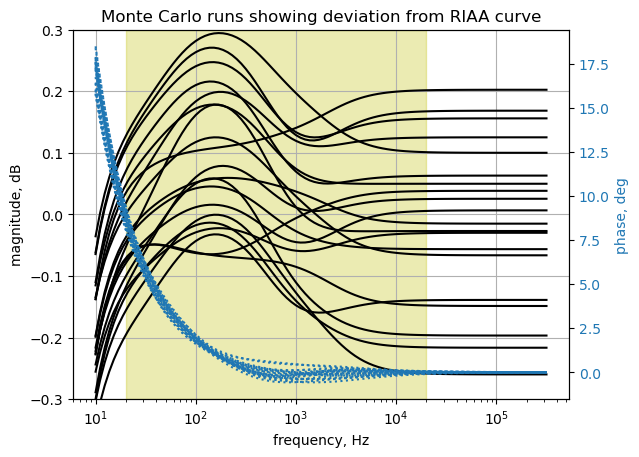

In [114]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

for i in range(0,num):
    plt.semilogx(w_RIAA/(2*np.pi), (mag_RIAA-RIAA_gain_1kHz) + (mag_ans[i]-preamp_gain_1kHz),'-k')    # Bode magnitude plot

ax1.tick_params(axis='y')
ax1.set_ylim((-0.3,0.3))
plt.grid()
plt.axvspan(20, 20e3, color='y', alpha=0.3)

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

for i in range(0,num):
    plt.semilogx(w_RIAA/(2*np.pi), phase_RIAA+phase_ans[i],':',color=color)  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monte Carlo runs showing deviation from RIAA curve')
plt.show()

The Monte Carlo simulation shows that the preamp amplitude response deviation from the RIAA curve can very from -0.2 to 0.3 dB over the audio band. If the performance requirement for this preamp was to be within $\pm$ 0.1 dB of the RIAA curve, then some redesign or tighter component tolerancing is required.   

### Worst case analysis
In a worst case analysis, we would look at:   

- minimum and maximum values of the initial component tolerance  
- maximum or minimum temperature coefficients of the parameters  
- maximum aging or drift of parameter values  

Since we usually can't tell by inspection which combination of minimum and maximum values will give the worst case, we can run a number of simulations in which all combinations of minimum and maximum variations are included. From the family of results we can look for the worst case.

In [115]:
print('number of components: {:d}'.format(len(nominal_component_value)))

number of components: 14


How many min and max combinations?

In [116]:
print('number of min and max combinations: {:,d}'.format(2**14))

number of min and max combinations: 16,384


16 thousand simulation runs too many. From the sensitivity analysis above, only R1, R2, R3, R6, Ro, C1 and C3 are sensitive. Running all combinations of the min and max tolerance for this set is reasonable and is $2^7=128$ combinations.

The tolerances for each of the components is defined below:

In [117]:
Tol = {Ro:0.01,R1:0.01,R2:0.01,R3:0.01,R6:0.01,C1:0.02,C3:0.01}

Only C1 has a tolerance other than 1%.

The array 'run' is created that consists of a binary count, with leading zeros from 0 to 127. Then the zero values are replaced with -1. 

In [118]:
run = []
for i in range(0,2**(len(Tol))):
    temp = list('{:07b}'.format(i)) # include leading zeros
    for j in range(len(temp)):
        temp[j] = int(temp[j])
    run.append(temp)

run = np.asarray(run)
run = np.where(run == 0, -1, run)

The first row of run is:

In [119]:
run[0]

array([-1, -1, -1, -1, -1, -1, -1])

In the for loop below, at i = 0, run[0] would be all -1's and this could apply the low tolerance range to the nominal component values. 

In [120]:
run[-1]

array([1, 1, 1, 1, 1, 1, 1])

The last time through the for loop, where i = 127, run[-1] is all 1's and this would apply the high tolerance range to the nominal component values. Between i = 0 and i = 127, all combinations of minimum and maximum tolerance are applied. 

In [121]:
new_x_axis_range = np.logspace(1, 5.5, 100, endpoint=True)*2*np.pi

# make some arrays to hold the results
mag_ans = np.zeros(shape=(len(run),len(new_x_axis_range)))
phase_ans = np.zeros(shape=(len(run),len(new_x_axis_range)))

The following cell takes about 90 seconds to run on my i3-8130U 2.20GHz laptop.

In [122]:
for i in range(len(run)):
    component_values_tol[Ro] = nominal_component_value[Ro]*(1+run[i][0]*Tol[Ro])
    component_values_tol[Rp] = nominal_component_value[Rp]

    component_values_tol[R1] = nominal_component_value[R1]*(1+run[i][1]*Tol[R1])
    component_values_tol[R2] = nominal_component_value[R2]*(1+run[i][2]*Tol[R2]) 
    component_values_tol[R3] = nominal_component_value[R3]*(1+run[i][3]*Tol[R3])

    component_values_tol[R4] = nominal_component_value[R4] 
    component_values_tol[R5] = nominal_component_value[R5]
    component_values_tol[R6] = nominal_component_value[R6]*(1+run[i][4]*Tol[R6])

    component_values_tol[Co] = nominal_component_value[Co]
    component_values_tol[Cp] = nominal_component_value[Cp]
    component_values_tol[C1] = nominal_component_value[C1]*(1+run[i][5]*Tol[C1])
    component_values_tol[C3] = nominal_component_value[C3]*(1+run[i][6]*Tol[C3])
    component_values_tol[C4] = nominal_component_value[C4]
    
    # enter the element values
    preamp_equ_tol = NE_sym.subs(component_values_tol)

    U_preamp_tol = solve(preamp_equ_tol,X)

    H_preamp_tol = U_preamp_tol[v2]/U_preamp_tol[v1]

    # Extract the numerator and denominator polynomials so that the system can be defined in SciPy.
    H_preamp_tol_num, H_preamp_tol_denom = fraction(H_preamp_tol) #returns numerator and denominator

    # convert symbolic to NumPy polynomial
    a2 = np.array(Poly(H_preamp_tol_num, s).all_coeffs(), dtype=float)
    b2 = np.array(Poly(H_preamp_tol_denom, s).all_coeffs(), dtype=float)
    preamp_sys_tol = signal.TransferFunction(a2,b2)

    w_preamp_sys_tol, mag_preamp_sys_tol, phase_preamp_sys_tol = preamp_sys_tol.bode(w=new_x_axis_range)
    mag_ans[i] = mag_preamp_sys_tol
    phase_ans[i] = phase_preamp_sys_tol

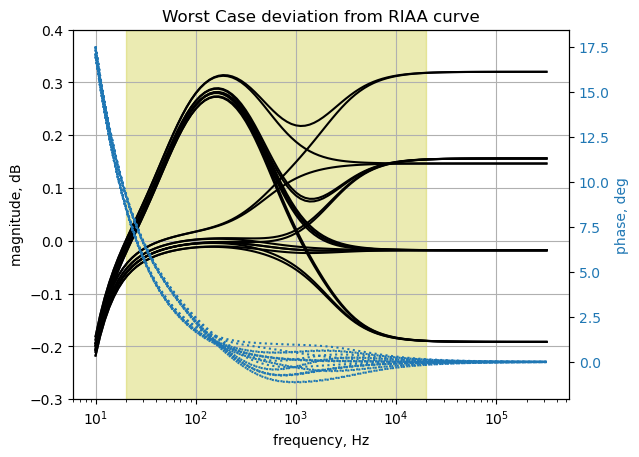

In [123]:
fig, ax1 = plt.subplots()
ax1.set_ylabel('magnitude, dB')
ax1.set_xlabel('frequency, Hz')

for i in range(0,num):
    plt.semilogx(w_RIAA/(2*np.pi), (mag_RIAA-RIAA_gain_1kHz) + (mag_ans[i]-preamp_gain_1kHz),'-k')    # Bode magnitude plot

ax1.tick_params(axis='y')
ax1.set_ylim((-0.3,0.4))
plt.grid()
plt.axvspan(20, 20e3, color='y', alpha=0.3)

# instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'

for i in range(0,num):
    plt.semilogx(w_RIAA/(2*np.pi), phase_RIAA+phase_ans[i],':',color=color)  # Bode phase plot

ax2.set_ylabel('phase, deg',color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Worst Case deviation from RIAA curve')
plt.show()

The results above show that the worst case tolerance conditions yield deviations of -0.19 to 0.3 dB from the RIAA curve.  

## Summary
The circuit presented in this analysis is just one example of many circuits that can be found online. For each design to be evaluated, some type of side by side analysis should be used to down select. This notebook can be used as a template for any comparative analysis.

The circuit in the app note appears to have low frequency group delay that might be an issue. Also the deviation from the RIAA curve using normal component tolerances does not meet the 0.1 dB requirement. The worst case analysis also confirms this. The circuit employs an expensive 200$\mu$ Farad film capacitor. The circuit is missing a subsonic filter.